In [1]:
from matplotlib import pyplot as plt, patches, gridspec
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

## Maps of region of interest

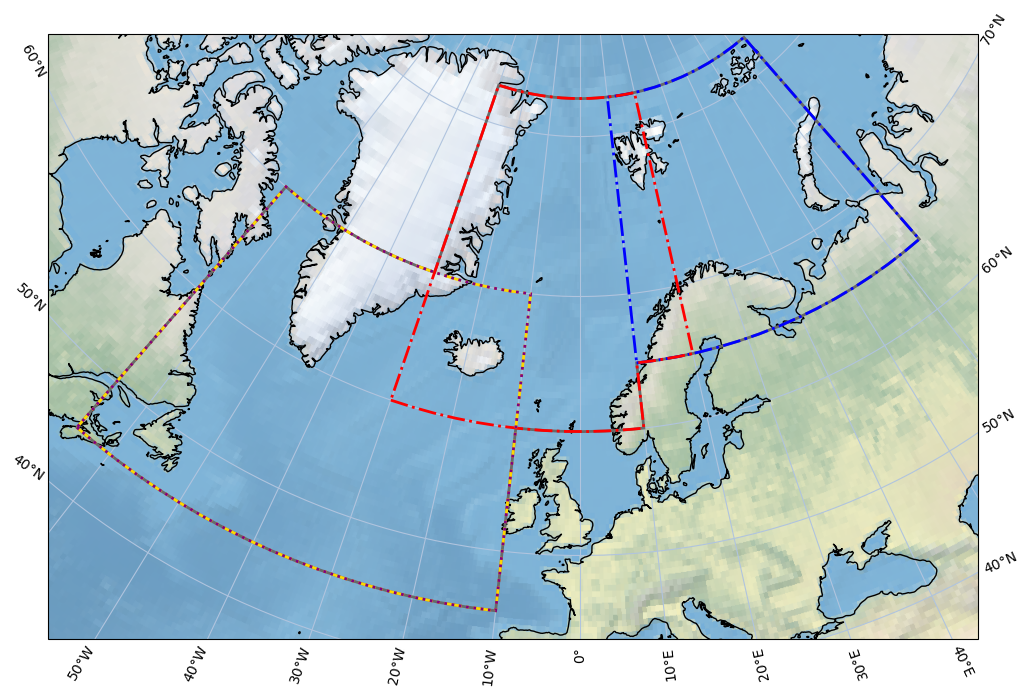

In [79]:
fig = plt.figure(figsize=[12,8])

map_proj = ccrs.LambertConformal(central_longitude=0)
map_proj._threshold /= 100

ax = plt.axes(projection=map_proj)
ax.set_extent([-67,48,43,82], crs=ccrs.PlateCarree())
ax.coastlines(resolution='50m')
ax.stock_img()

gl = ax.gridlines(draw_labels=True, color = 'lightsteelblue',  xlocs = [x for x in range(-60,70,10)], \
                  ylocs = [y for y in range(40,90,10)], x_inline=False, y_inline=False, zorder=1)
gl.top_labels = False

aoi_corners = [[-65,45],[-10,45],[-10,60],[10,60],[10,65],[65,65],[65,82],[-30,82], [-30,70],[-65,70],[-65,45]]
aoi = patches.Polygon(xy=aoi_corners, edgecolor='dimgrey', facecolor='none', linewidth=2, transform=ccrs.PlateCarree(), zorder=2)
ax.add_patch(aoi)

gin_corners = [[-30,60],[10,60],[10,65],[20,65],[20,82],[-30,82],[-30,60]]
barents_corners = [[10,65],[65,65],[65,82],[10,82],[10,65]]
labrador_corners = [[-65,45],[-10,45],[-10,70],[-65,70],[-65,45]]

# Barents Sea subregion
barents_box = patches.Polygon(xy=barents_corners, edgecolor='blue', fc='none', lw=2, ls='-.', transform=ccrs.PlateCarree(), zorder=3)
ax.add_patch(barents_box)

# Greenland-Iceland-Norwegian Seas subregion
gin_box = patches.Polygon(xy=gin_corners, edgecolor='red', fc='none', lw=2, ls='-.', transform=ccrs.PlateCarree(), zorder=4)
ax.add_patch(gin_box)

# Labrador Sea subregion
labrador_box = patches.Polygon(xy=labrador_corners, edgecolor='gold', fc='none', lw=2, ls='-.', transform=ccrs.PlateCarree(), zorder=5)
ax.add_patch(labrador_box)

bb1_corners = [[-65,45],[-10,45],[-10,70],[-65,70],[-65,45]] # Labrador Sea
bb2_corners = [[-30,60],[10,60],[10,82],[-30,82],[-30,60]] # Most of GIN Seas
bb3_corners = [[10,65],[65,65],[65,82],[10,82],[10,65]] # Barents Sea

bb1 = patches.Polygon(xy=bb1_corners, edgecolor='purple', fc='none', lw=2, ls=':', transform=ccrs.PlateCarree(), zorder=6)
ax.add_patch(bb1)